In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("airline-passenger-traffic.csv", header=None)
data.columns = ["Month", "Passengers"]
data["Month"] = pd.to_datetime(data["Month"], format="%Y-%m")
data = data.set_index("Month")
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [3]:
data.shape

(144, 1)

## Time Series Analysis

## Plot time series data

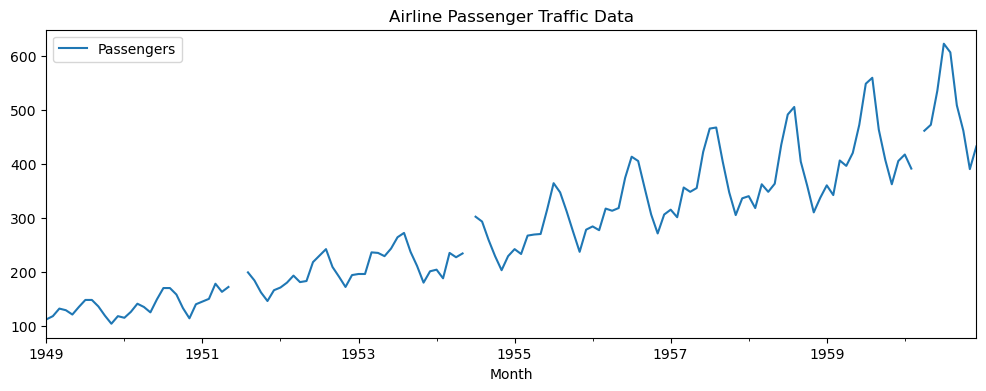

In [4]:
data.plot(figsize=([12,4]))
plt.legend(loc='best')
plt.title('Airline Passenger Traffic Data')
plt.show()

## Missing Value Treatment

### Mean Imputation

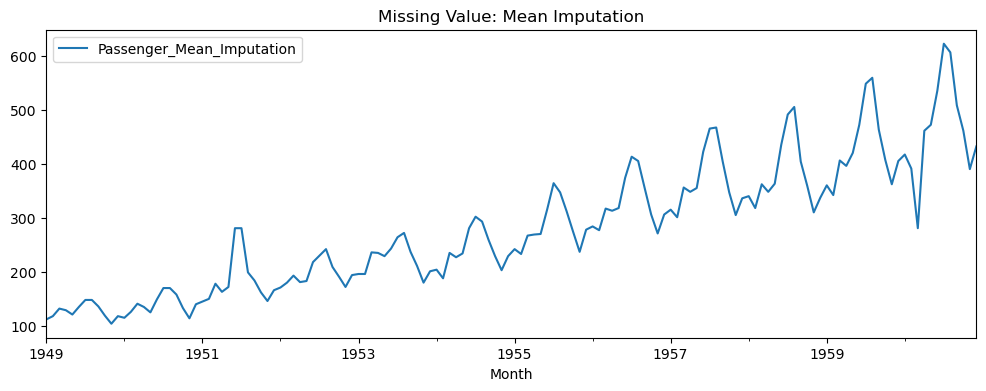

In [5]:
# help(data.assign)
data = data.assign(Passenger_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[["Passenger_Mean_Imputation"]].plot(figsize=(12,4))
plt.title('Missing Value: Mean Imputation')
plt.show()

### Linear Interpolation

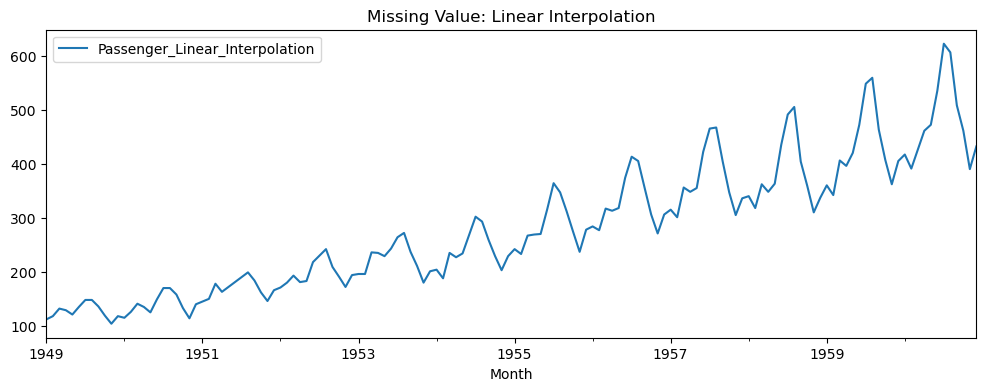

In [6]:
data = data.assign(Passenger_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[["Passenger_Linear_Interpolation"]].plot(figsize=[12,4])
plt.legend(loc='best')
plt.title("Missing Value: Linear Interpolation")
plt.show()

#### Use linear interpolate to impute missing values

In [7]:
data["Passengers"] = data["Passenger_Linear_Interpolation"]

### Detecting Outliers

#### Boxplot

In [8]:
import seaborn as sns

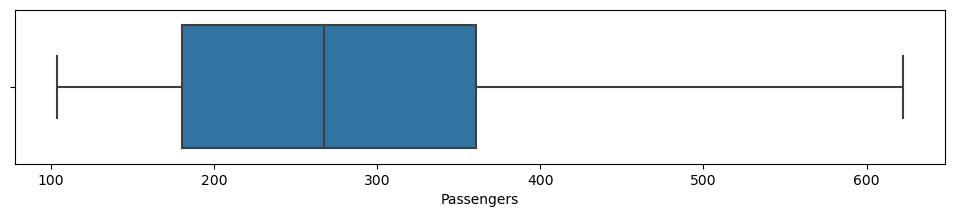

In [9]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1.5)

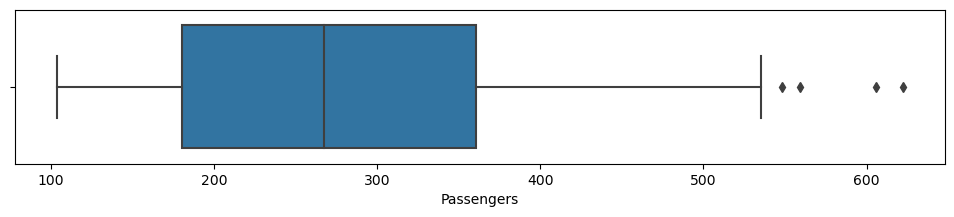

In [10]:
fig = plt.subplots(figsize=([12,2]))
ax = sns.boxplot(x=data["Passengers"], whis=1)

#### Histogram Plot

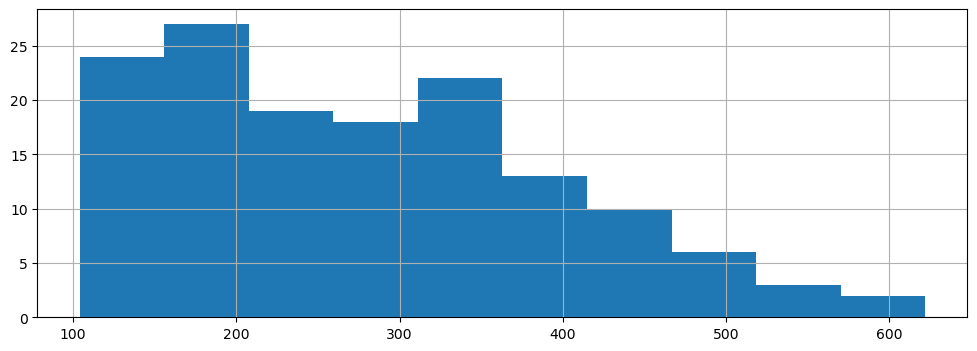

In [11]:
fig = data.Passengers.hist(figsize=([12,4]))

No outliers detected in the data.

### Time Series Decomposition

#### Additive Seasonal Component

In [12]:
from pylab import rcParams
import statsmodels.api as sm

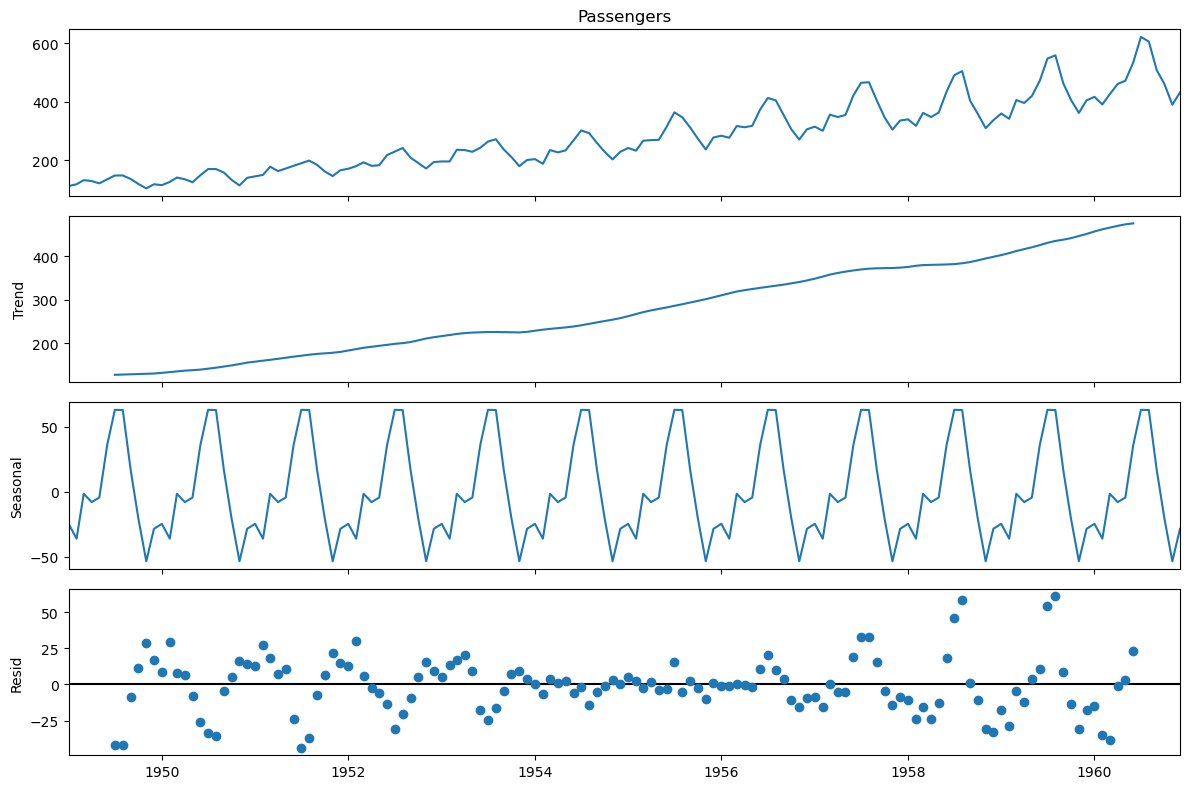

In [13]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

* The residual component is still having some pattern, which means Additive decomposition was not able to extract some part of seasonality. 

#### Multiplicative Seasonal Component

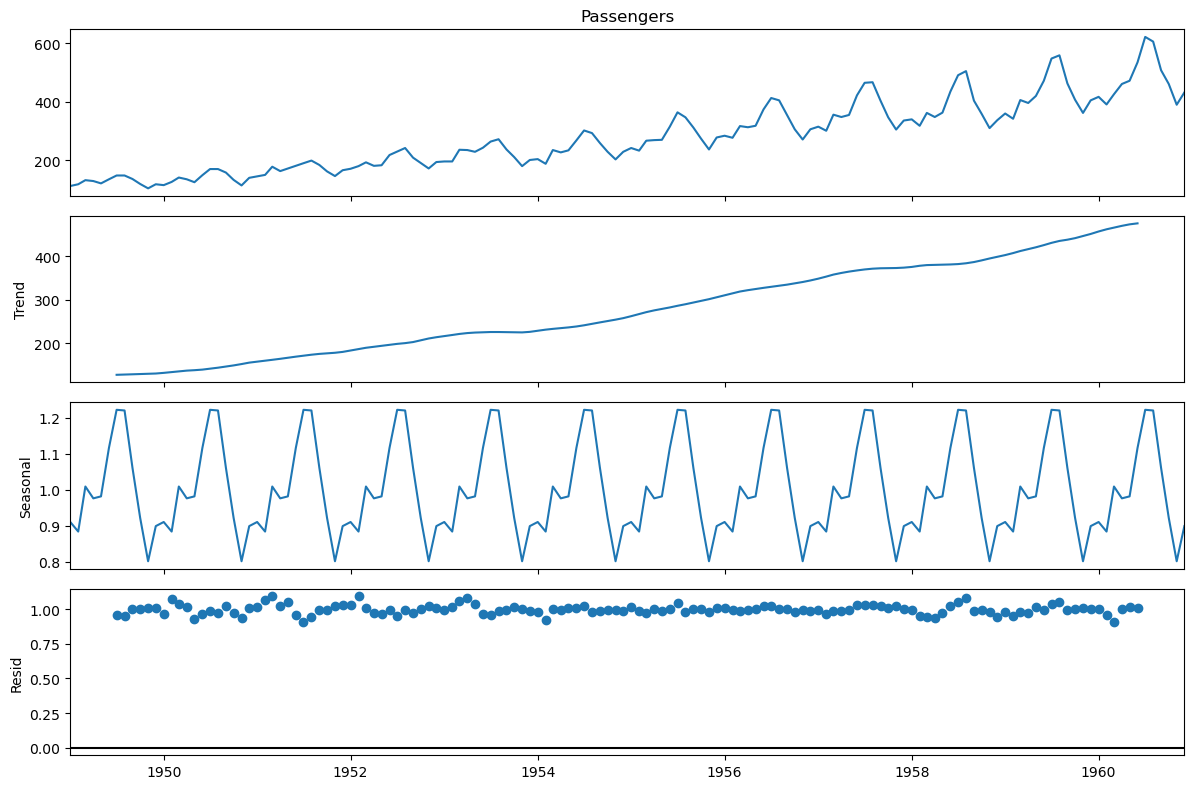

In [14]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative')
fig = decomposition.plot()
plt.show()

### Build & Evaluate Time Series Forecast   

#### Splitting Time Series into Training & Test Sets

In [15]:
train_len = 120
train = data[0:train_len]
test = data[train_len:]

#### Naive Method

In [16]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

##### Plot train, test & forecast 

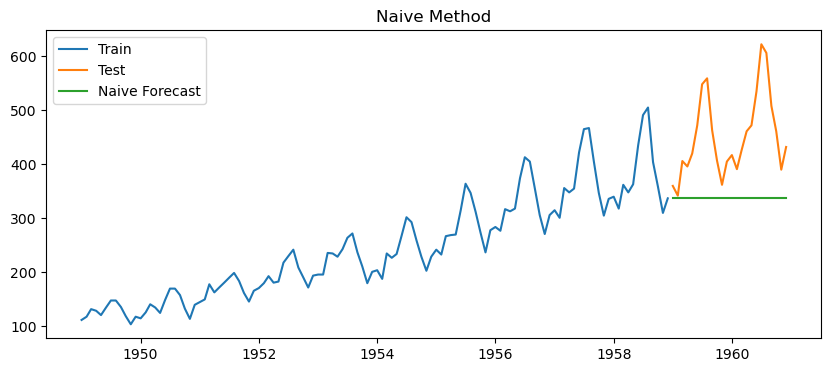

In [17]:
plt.figure(figsize=(10,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

##### Calculate RMSE & MAPE to Evaluate Forecast

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers'] - y_hat_naive['naive_forecast'])/test['Passengers'])*100, 2)

results = pd.DataFrame({
    'Method':['Naive method'],
    'RMSE':[rmse],
    'MAPE':[mape]
})
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


#### Simple Average Method

In [20]:
y_hat_avg = test.copy()
y_hat_avg["avg_forecast"] = train["Passengers"].mean()

##### Plot train, test & forecast 

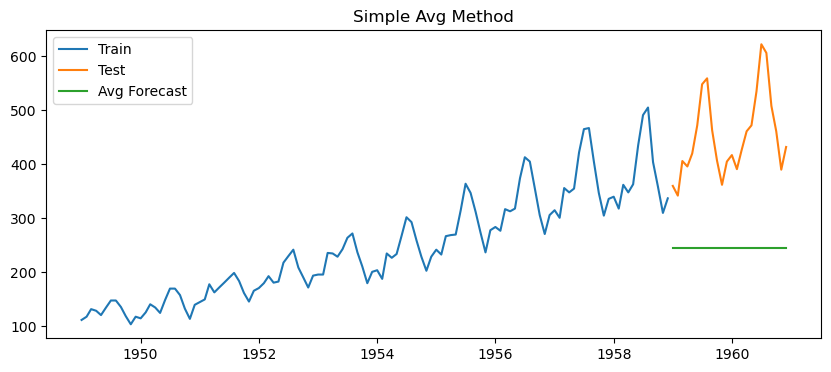

In [21]:
plt.figure(figsize=[10,4])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title("Simple Avg Method")
plt.show()

##### Calculate RMSE & MAPE to Evaluate Forecast

In [22]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg["avg_forecast"])).round(2)
mape = (np.mean(np.abs(test['Passengers'] - y_hat_avg["avg_forecast"])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Simple Average Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})

results = pd.concat([results,tempResults]) 
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28


#### Simple Moving Average

In [23]:
y_hat_sma = data.copy()
ma_window = 12
# y_hat_sma['Passengers1'] = y_hat_sma['Passengers'][:train_len]
# y_hat_sma['sma_forecast'] = y_hat_sma['Passengers1'].rolling(ma_window, min_periods=6).mean()
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

##### Plot Train, Test & Forecast

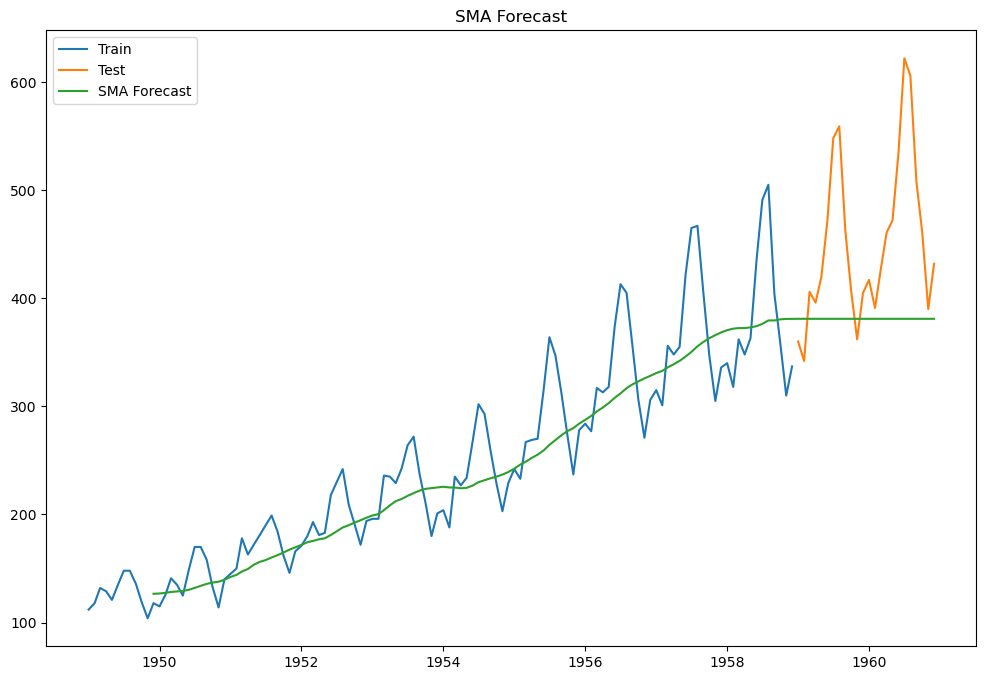

In [24]:
plt.figure(figsize=[12,8])
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='SMA Forecast')
plt.legend(loc='best')
plt.title('SMA Forecast')
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = (np.mean(np.abs(test['Passengers'] - y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100).round(2)

tempResults = pd.DataFrame({
    'Method' : ['Simple Moving Method'],
    'RMSE' : [rmse],
    'MAPE' : [mape]
})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple Average Method,219.69,44.28
0,Simple Moving Method,103.33,15.54
